# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [ ]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.
text2_guesses = [17, 5, 6, 2, 1, 1, 1, 1, 16, 12, 1, 2, 1, 2, 1, 1, 3, 1, 17, 1, 11, 6, 1, 1, 1, 2, 2, 3, 18, 7, 11, 1, 8, 1, 1,
                 1, 1, 2, 5, 4, 1, 1, 1, 1, 1, 1, 1]
text3_guesses = [1, 5, 3, 18, 25, 3, 21, 1, 3, 4, 5, 7, 9, 1, 1, 1, 1, 1, 2, 1, 4, 1, 2, 1, 1, 16, 1, 23, 4, 1, 3, 1, 1, 2, 1, 5,
                 22, 10, 3, 6, 4, 14, 4, 11, 22, 2, 6, 17, 3, 1, 2, 1, 1, 1, 1, 6, 4, 27, 1, 1, 1, 1, 1, 5, 2, 1, 1]
text4_guesses = [5, 1, 26, 1, 1, 2, 24, 2, 3, 3, 1, 1, 1, 1, 1, 13, 10, 4, 1, 1, 1, 1, 1, 1, 26, 1, 8, 7, 7, 1, 4, 1, 12, 2, 8,
                 2, 1, 1, 1, 6, 4, 2, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1]


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [ ]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.
def calculate_text_length(text, text_length = 0):
  for ch in text:
    if 97 <= ord(ch) <= 122:
      text_length += 1
  return text_length

text2 = "f	e	d	e	r	a	l		o	f	f	i	c	i	a	l	s		b	e	g	a	n		t	o		s	t	o	c	k	p	i	l	e		a	m	m	u	n	i	t	i	o	n"
text2_length = calculate_text_length(text2, 5)

text3 = "t	o		d	r	a	w		c	o	n	c	l	u	s	i	o	n	s		f	r	o	m		m	a	t	e	r	i	a	l	s		o	f	t	e	n		d	i	s	c	o	r	d	a	n	t		i	s		n	o		e	a	s	y		t	a s k"
text3_length = calculate_text_length(text3, 10)

text4 = "e	a	c	h		i	t	e	r	a	t	i	o	n		t	e	n	d	s		t	o		b	e	g	e	t		a		b	e	t	t	e	r		c	o	p	y		t	h	a	n		t	h	e		l	a	s	t"
text4_length = calculate_text_length(text4, 10)

matrix_counts = [[0]*max(text2_length, text3_length, text4_length) for rows in range(28)]

def update_matrix_count(matrix_counts: list[list[int]],
                        text_guesses: list[int]):
  for context_length in range(len(text_guesses)):
    matrix_counts[text_guesses[context_length]][context_length] += 1
  return matrix_counts

matrix_counts = update_matrix_count(matrix_counts, text2_guesses)
matrix_counts = update_matrix_count(matrix_counts, text3_guesses)
matrix_counts = update_matrix_count(matrix_counts, text4_guesses)

import pandas as pd
df = pd.DataFrame(matrix_counts)
df_copy = df.copy()

# x-axis - Context length
# y-axis - No. of guesses
df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,2,1,1,2,0,0,...,0,1,1,1,1,1,0,0,1,1
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [ ]:
# TODO: Compute the upper bound for each amount of context N and print it out.
df = df_copy.copy()
df = df.astype(float)
df.iloc[:, :47] = df.iloc[:, :47]/3
df.iloc[:, 47:57] = df.iloc[:, 47:57]/2

import math

def calculate_upper_bound(i, column):
  q_i_N = column[i]
  if q_i_N == 0:
    return 0
  return -q_i_N * (math.log(q_i_N, 2))

def calculate_bound(calculate_bound):
  bound = [0] * max(text2_length, text3_length, text4_length)
  for col in range(len(bound)):
    column = df.iloc[:, col]
    for i in range(1, len(column)):
      q_i_N = column[i]
      bound[col] += calculate_bound(i, column)
  return bound

upper_bound = calculate_bound(calculate_upper_bound)
for N in range(len(upper_bound)):
  print(f"For context {N}: upper bound is {upper_bound[N]}")

For context 0: upper bound is 1.584962500721156
For context 1: upper bound is 0.9182958340544896
For context 2: upper bound is 1.584962500721156
For context 3: upper bound is 1.584962500721156
For context 4: upper bound is 0.9182958340544896
For context 5: upper bound is 1.584962500721156
For context 6: upper bound is 1.584962500721156
For context 7: upper bound is 0.9182958340544896
For context 8: upper bound is 0.9182958340544896
For context 9: upper bound is 1.584962500721156
For context 10: upper bound is 0.9182958340544896
For context 11: upper bound is 1.584962500721156
For context 12: upper bound is 0.9182958340544896
For context 13: upper bound is 0.9182958340544896
For context 14: upper bound is 0.0
For context 15: upper bound is 0.9182958340544896
For context 16: upper bound is 1.584962500721156
For context 17: upper bound is 0.9182958340544896
For context 18: upper bound is 1.584962500721156
For context 19: upper bound is 0.0
For context 20: upper bound is 1.584962500721156


Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [ ]:
# TODO: Compute thew lower bound for each amount of context N and print it out.

def calculate_lower_bound(i, column):
  q_i_N = column[i]
  result = i * q_i_N * (math.log(i, 2))
  if i == len(column)-1:
    return result
  q_i1_N = column[i+1]
  result -= i * q_i1_N * (math.log(i, 2))
  return result

lower_bound = calculate_bound(calculate_lower_bound)
for N in range(len(lower_bound)):
  print(f"For context {N}: lower bound is {lower_bound[N]}")

For context 0: lower bound is 3.032169591897528
For context 1: lower bound is 2.406426982957874
For context 2: lower bound is 4.256683319784635
For context 3: lower bound is 2.523927241568618
For context 4: lower bound is 2.0191015756867756
For context 5: lower bound is 1.5849625007211563
For context 6: lower bound is 3.9324263362010683
For context 7: lower bound is 0.6666666666666666
For context 8: lower bound is 3.6354720233997178
For context 9: lower bound is 3.6552674012145356
For context 10: lower bound is 1.203213491478937
For context 11: lower bound is 2.0472364833587635
For context 12: lower bound is 1.5097750043269382
For context 13: lower bound is 0.6666666666666666
For context 14: lower bound is 0.0
For context 15: lower bound is 1.6953887757267712
For context 16: lower bound is 2.4816144793520927
For context 17: lower bound is 1.0817041659455102
For context 18: lower bound is 2.4956227670852584
For context 19: lower bound is 0.0
For context 20: lower bound is 2.693193117991

## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [ ]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

--2025-09-20 03:11:11--  http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz
Resolving khoury.northeastern.edu (khoury.northeastern.edu)... 52.70.229.197
Connecting to khoury.northeastern.edu (khoury.northeastern.edu)|52.70.229.197|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150984197 (144M) [application/x-gzip]
Saving to: ‘pg-sample.json.gz’

pg-sample.json.gz   100%[===================>] 143.99M  50.6MB/s    in 2.8s    

2025-09-20 03:11:14 (50.6 MB/s) - ‘pg-sample.json.gz’ saved [150984197/150984197]



The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [ ]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [ ]:
with gzip.open("pg-sample.json.gz", "rt", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df.head()

,id,author,title,text
0,PG1,"Jefferson, Thomas",The Declaration of Independence of the United ...,\n\nThis is a retranscription of one of the fi...
1,PG100,"Shakespeare, William",The Complete Works of William Shakespeare,﻿*** START OF THE PROJECT GUTENBERG EBOOK THE ...
2,PG10000,Anonymous,The Magna Carta,\n\n\n\nThe Magna Carta\n\n\nContents\n\n The ...
3,PG10001,"Seneca, Lucius Annaeus",Apocolocyntosis,\n\n\n\n SENECA\n\n APOCOLOCYNTOSIS\n\n WITH A...
4,PG10002,"Hodgson, William Hope",The House on the Borderland,\n\n\n\nTHE HOUSE ON THE BORDERLAND\n\nWilliam...


In [ ]:
import re

split_pattern = re.compile(r'[^a-zA-Z0-9]+')
tokenize_lower_func = lambda text: split_pattern.split(text.lower())

pattern = re.compile(r'[a-z]')
contains_letter_func = lambda tokenized_list: list(filter(lambda token: pattern.search(token), tokenized_list))

final_df = pd.DataFrame(df['text'].map(tokenize_lower_func).map(contains_letter_func))
final_df.head()

,text
0,"[this, is, a, retranscription, of, one, of, th..."
1,"[start, of, the, project, gutenberg, ebook, th..."
2,"[the, magna, carta, contents, the, text, of, m..."
3,"[seneca, apocolocyntosis, with, an, english, t..."
4,"[the, house, on, the, borderland, william, hop..."


In [ ]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.

master_token_list = [token for token_list in final_df['text']
                     for token in token_list]
print(f"***Total number of tokens: {len(master_token_list)}")
print(f"***Master Token List\n{pd.Series(master_token_list)}")

***Total number of tokens: 69635048
***Master Token List
0                      this
1                        is
2                         a
3           retranscription
4                        of
                 ...       
69635043                 to
69635044               hear
69635045              about
69635046                new
69635047             ebooks
Length: 69635048, dtype: object


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [ ]:
# TODO: Compute an an array of unigrams in descending order of frequency.
# Print the most common word and its frequency.

from collections import defaultdict

unigrams = defaultdict(int)
for token_list in final_df['text']:
  for i in range(len(token_list)):
    unigrams[token_list[i]] += 1
sorted_unigrams = sorted(unigrams.items(), key = lambda x: x[1],
                         reverse=True)

print(f"""***The most common word is: {sorted_unigrams[0][0]};
its frequency is: {sorted_unigrams[0][1]}""")
print(f"""***Unigrams in descending order of frequency\n
{pd.DataFrame(sorted_unigrams,
              columns = ["Unigrams", "Frequency"])}""")

***The most common word is: the; its frequency is: 4468489
***Unigrams in descending order of frequency
          Unigrams  Frequency
0              the    4468489
1               of    2486678
2              and    2286006
3               to    1862529
4                a    1437964
...            ...        ...
335277   applicati          1
335278   prosperit          1
335279     coltura          1
335280  magazinist          1
335281   cristabel          1

[335282 rows x 2 columns]


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

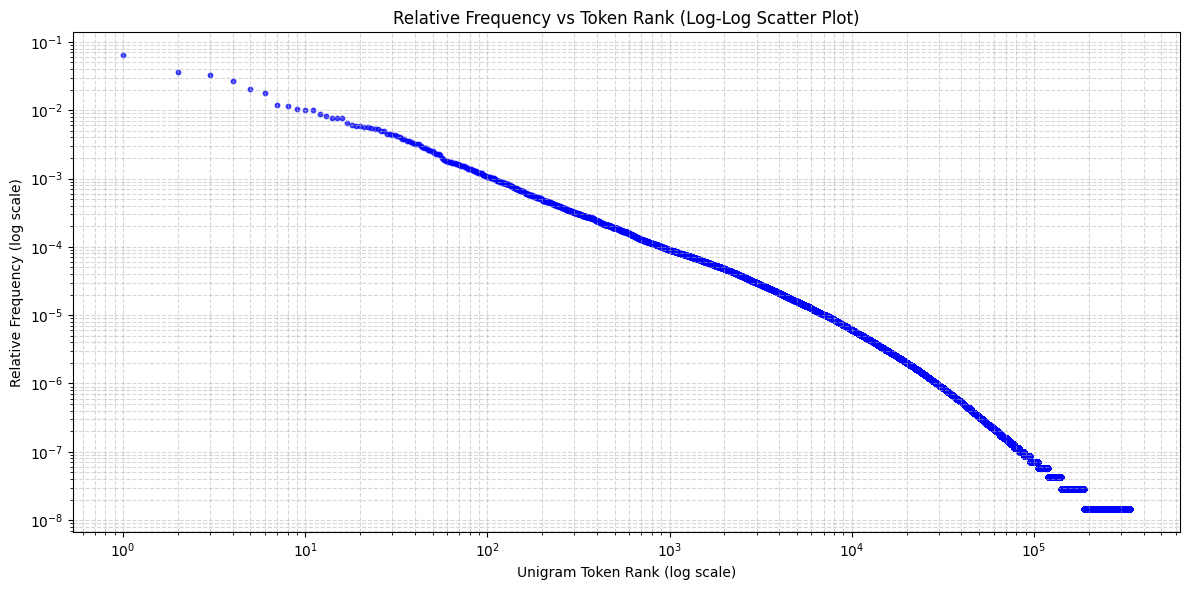

In [ ]:
# TODO: Plot rank vs. relative frequency of unigrams.

import matplotlib.pyplot as plt

def get_sorted_grams(sorted_grams, total_tokens):
  sorted_grams_df = pd.DataFrame(sorted_grams, columns=['gram_tokens',
                                        'relative_frequency'])
  sorted_grams_df['relative_frequency'] =
        sorted_grams_df['relative_frequency']/total_tokens
  return sorted_grams_df

def plot_graph(sorted_grams_df, xlabel):
  plt.figure(figsize=(12,6))
  plt.scatter(x=sorted_grams_df.index+1,
              y=sorted_grams_df['relative_frequency'],
              s=10, color='blue', alpha=0.7)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel(xlabel)
  plt.ylabel('Relative Frequency (log scale)')
  plt.title('Relative Frequency vs Token Rank (Log-Log Scatter Plot)')
  plt.grid(True, which='both', linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()

final_df['unigram_tokens'] = final_df['text'].
                              map(lambda tokens: len(tokens))
total_unigram_tokens = final_df['unigram_tokens'].sum(0)

sorted_unigrams_df = get_sorted_grams(sorted_unigrams, total_unigram_tokens)
plot_graph(sorted_unigrams_df, 'Unigram Token Rank (log scale)')

Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

In [ ]:
# TODO: Compute sorted bigram and trigram statistics.
# Print out the most common bigram and trigram.
# Plot rank vs. relative frequency for bigrams and trigrams.
# You may make separate plots or put them on the same plot and label them.

final_df['bigram_tokens'] = final_df['unigram_tokens'] - 1
total_bigram_tokens = final_df['bigram_tokens'].sum(0)
print(f"***Total number of bigrams: {total_bigram_tokens}")

final_df['trigram_tokens'] = final_df['unigram_tokens'] - 2
total_trigram_tokens = final_df['trigram_tokens'].sum(0)
print(f"***Total number of trigrams: {total_trigram_tokens}")

***Total number of bigrams: 69634048
***Total number of trigrams: 69633048


In [ ]:
bigrams = defaultdict(int)
for token_list in final_df['text']:
  for i in range(len(token_list)-1):
    bigrams[(token_list[i], token_list[i+1])] += 1
sorted_bigrams = sorted(bigrams.items(), key = lambda x: x[1], reverse=True)
print(f"""***The most common bigram is: {" ".join(sorted_bigrams[0][0])};
 its frequency is: {sorted_bigrams[0][1]}""")
print(f"""***Bigrams in descending order of frequency\n
{pd.DataFrame(sorted_bigrams, columns = ["Bigrams", "Frequency"])}""")

***The most common bigram is: of the; its frequency is: 663194
***Bigrams in descending order of frequency
                          Bigrams  Frequency
0                       (of, the)     663194
1                       (in, the)     344757
2                       (to, the)     254998
3                      (and, the)     170400
4                       (on, the)     146481
...                           ...        ...
8841059  (whittlesey, washington)          1
8841060   (washington, published)          1
8841061        (institution, new)          1
8841062             (index, vols)          1
8841063          (brothers, 24mo)          1

[8841064 rows x 2 columns]


In [ ]:
trigrams = defaultdict(int)
for token_list in final_df['text']:
  for i in range(len(token_list)-2):
    trigrams[(token_list[i], token_list[i+1], token_list[i+2])] += 1
sorted_trigrams = sorted(trigrams.items(), key = lambda x: x[1], reverse=True)
print(f"""***The most common trigram is: {" ".join(sorted_trigrams[0][0])};
 its frequency is: {sorted_trigrams[0][1]}""")
print(f"""***Trigrams in descending order of frequency\n
{pd.DataFrame(sorted_trigrams, columns = ["Trigrams", "Frequency"])}""")

***The most common trigram is: one of the; its frequency is: 21817
***Trigrams in descending order of frequency
                           Trigrams  Frequency
0                    (one, of, the)      21817
1         (the, project, gutenberg)      19639
2             (the, united, states)      18570
3                       (i, don, t)      14552
4                    (out, of, the)      14344
...                             ...        ...
31964472     (nominum, index, vols)          1
31964473          (index, vols, ii)          1
31964474            (and, iii, new)          1
31964475   (harper, brothers, 24mo)          1
31964476       (brothers, 24mo, pp)          1

[31964477 rows x 2 columns]


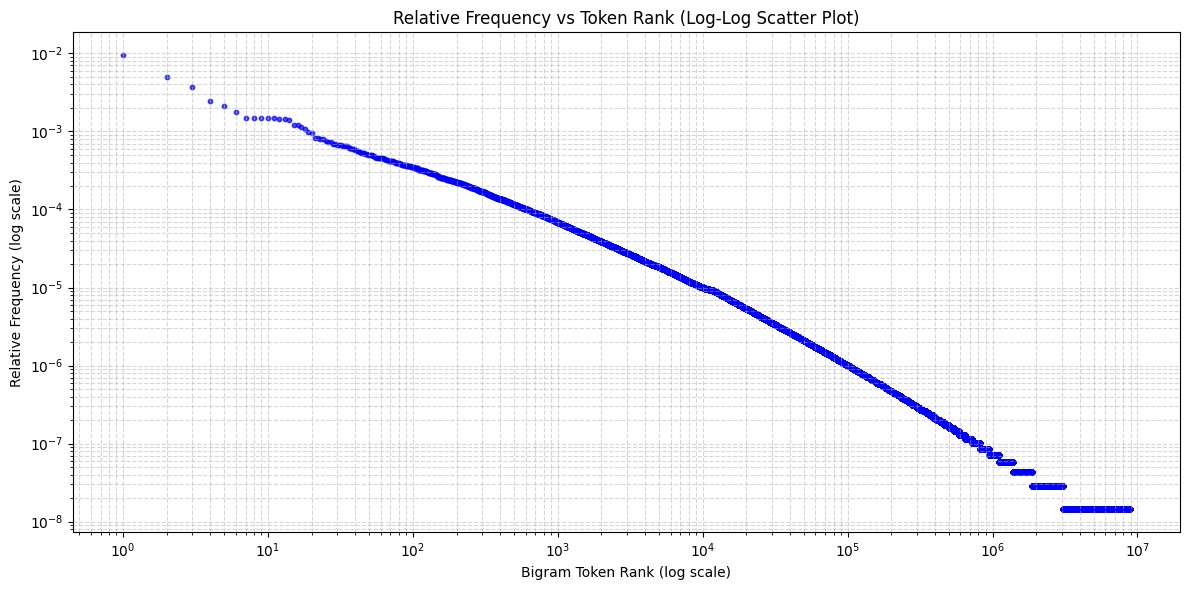

In [ ]:
sorted_bigrams_df = get_sorted_grams(sorted_bigrams, total_bigram_tokens)
plot_graph(sorted_bigrams_df, 'Bigram Token Rank (log scale)')

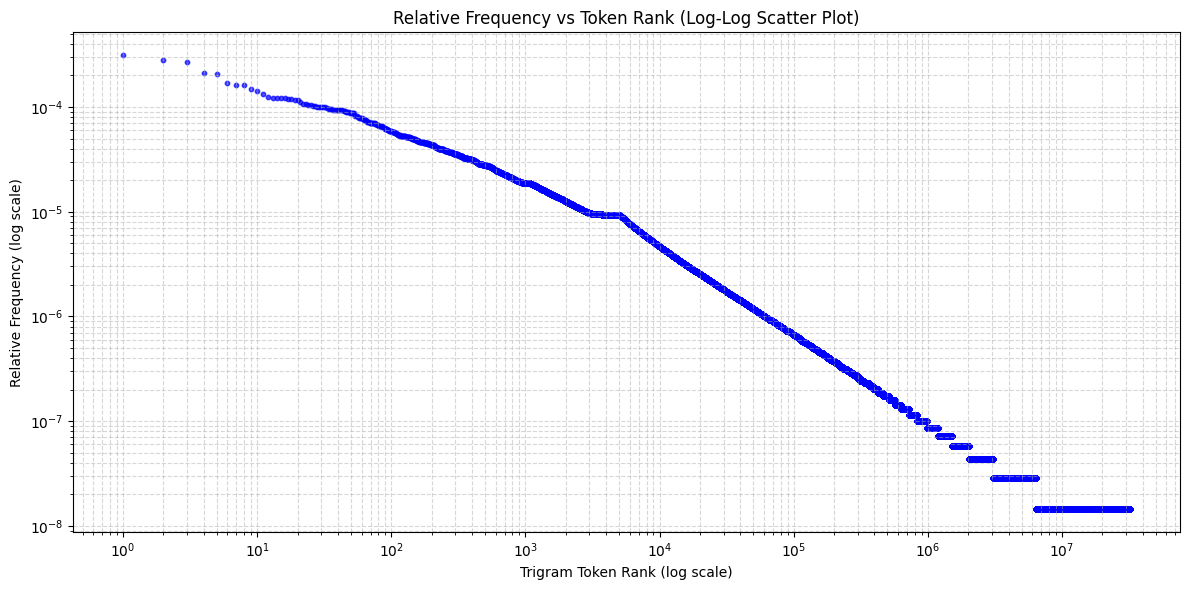

In [ ]:
sorted_trigrams_df = get_sorted_grams(sorted_trigrams, total_trigram_tokens)
plot_graph(sorted_trigrams_df, 'Trigram Token Rank (log scale)')

**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.

The unigram plot follows the Zipf's law without much deviations. I observe a slight curve at the start and at the end it flattens out indicating that many words have same low frequencies.

The bigram plot is having lesser relative frequency even for the most common bigrams than the unigram distribution in comparison. It also has a longer tail suggesting greater words have same low frequencies.

The trigram distribution which is like the noisiest of the three, is having the least relative frequency for most common trigrams in comparison to the most common bigrams & trigrams. It has the longest tail of the three representing many words having the same low frequency.